In [1]:
import pandas as pd
import numpy as np


In [2]:
house_df = pd.read_csv("./kc_house_data.csv")

In [3]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
house_df.drop(['id','date'],axis = 1, inplace = True)

In [7]:
house_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

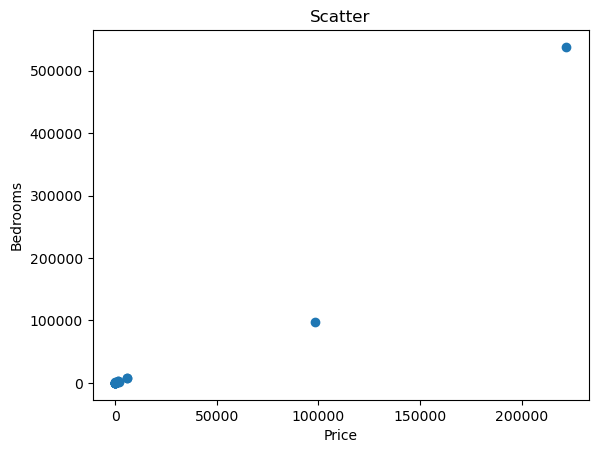

In [8]:
import matplotlib.pyplot as plt
plt.title("Scatter")
plt.scatter(house_df.iloc[0],house_df.iloc[1])
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.show()

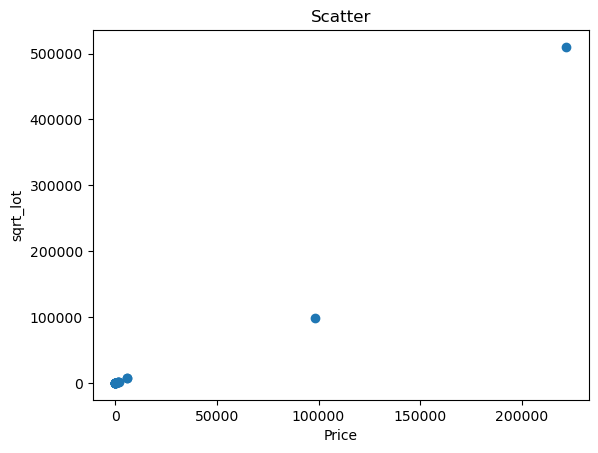

In [9]:
plt.title("Scatter")
plt.scatter(house_df.iloc[0],house_df.iloc[4])
plt.xlabel("Price")
plt.ylabel("sqrt_lot")
plt.show()

In [18]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [14]:
x_dep = house_df[['bedrooms', 'bathrooms']]
x_dep

,bedrooms,bathrooms
0,3,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00
...,...,...
21608,3,2.50
21609,4,2.50
21610,2,0.75
21611,3,2.50


In [35]:
y_ind =  house_df[["sqft_living"]]

In [30]:
MLRtrain_X,MLRtest_X,MLRtrain_Y,MLRtest_y = train_test_split(ml_X,y_ind, train_size=0.8, random_state=42)

In [31]:
ml_X = sm.add_constant(x_dep)

In [32]:
MLRmodel = sm.OLS(MLRtest_y,MLRtest_X).fit()

In [33]:
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3673.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:28:55   Log-Likelihood:                -33678.
No. Observations:                4323   AIC:                         6.736e+04
Df Residuals:                    4320   BIC:                         6.738e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -436.6075     34.777    -12.554      0.000    -504.788    -368.427
bedrooms     268.0105     11.257     23.809      0.000     245.942     290.079
bathrooms    771.3540     13.285     58.063      0.000     745.309     797.399
==============================================================================
Omnibus:                     1334.708   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11209.336
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                      10.494   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# lets try another

In [36]:
x_dep = house_df[['view', 'condition']]

In [37]:
y_ind =  house_df[["price"]]

In [38]:
MLRtrain_X,MLRtest_X,MLRtrain_Y,MLRtest_y = train_test_split(ml_X,y_ind, train_size=0.8, random_state=42)

In [39]:
ml_X = sm.add_constant(x_dep)

In [40]:
MLRmodel = sm.OLS(MLRtest_y,MLRtest_X).fit()

In [41]:
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     810.7
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.12e-299
Time:                        22:31:51   Log-Likelihood:                -61086.
No. Observations:                4323   AIC:                         1.222e+05
Df Residuals:                    4320   BIC:                         1.222e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.504e+04   1.97e+04     -2.285      0.022   -8.37e+04   -6402.133
bedrooms     2.27e+04   6379.649      3.558      0.000    1.02e+04    3.52e+04
bathrooms   2.443e+05   7529.161     32.452      0.000     2.3e+05    2.59e+05
==============================================================================
Omnibus:                     3361.364   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117001.939
Skew:                           3.407   Prob(JB):                         0.00
Kurtosis:                      27.559   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## lets try after transformation

In [12]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
scaled_house = pd.DataFrame(mmsc.fit_transform(house_df),columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'])

In [13]:
scaled_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


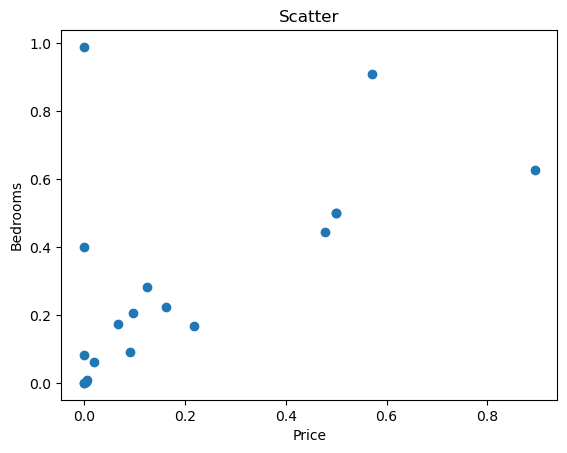

In [15]:
import matplotlib.pyplot as plt
plt.title("Scatter")
plt.scatter(scaled_house.iloc[0],scaled_house.iloc[1])
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.show()

In [19]:
x_dep = house_df[['view', 'condition']]
y_ind =  house_df[["price"]]


MLRtrain_X,MLRtest_X,MLRtrain_Y,MLRtest_y = train_test_split(x_dep,y_ind, train_size=0.8, random_state=42)
ml_X = sm.add_constant(x_dep)


MLRmodel = sm.OLS(MLRtest_y,MLRtest_X).fit()
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              5247.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                        0.00
Time:                        22:45:05   Log-Likelihood:                         -61483.
No. Observations:                4323   AIC:                                  1.230e+05
Df Residuals:                    4321   BIC:                                  1.230e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
view        2.083e+05   7052.968     29.538      0.000    1.95e+05    2.22e+05
condition   1.416e+05   1663.148     85.120      0.000    1.38e+05    1.45e+05
==============================================================================
Omnibus:                     3247.844   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114674.288
Skew:                           3.222   Prob(JB):                         0.00
Kurtosis:                      27.395   Cond. No.                         4.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""